In [1]:
from construct_eq_fpr_df import construct_df_for_eq_div_fpr
from construct_eq_fpr_df import get_fpr_eq_div
from get_data_fico import get_fpr_tpr_fico
from get_data_fico import get_base_rates
from get_data_fico import get_totals
import matplotlib.pylab as plt 
#from responsibly.dataset import build_FICO_dataset
from fairmlbook.code.creditscore_compas import criteria
from onehalfthreshold import get_optimal_fp_tp
from onehalfthreshold import get_optimal_fp_tp_hardtf
from onehalfthreshold import get_indices_for_a_opt
from onehalfthreshold import get_fpa_opt_tpa_opt_thres_a_opt
from matplotlib.font_manager import FontProperties
import pandas as pd 

unable to import 'smart_open.gcs', disabling that module
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [2]:
%%markdown
# Data 

# Data 


In [3]:
#list of attributes are Asian, Hispanic, Black, White 
fpr_df, tpr_df = get_fpr_tpr_fico()
data_fpr_Asian = fpr_df['Asian']
data_tpr_Asian = tpr_df['Asian']

data_fpr_Hispanic = fpr_df['Hispanic']
data_tpr_Hispanic = tpr_df['Hispanic']

data_fpr_Black = fpr_df['Black']
data_tpr_Black = tpr_df['Black']

data_fpr_White = fpr_df['White']
data_tpr_White = tpr_df['White']

#fraction of non-defaulters in each group 
fraction_non_defaulters = get_base_rates()

totals = get_totals()

In [4]:
eq_fpr_df = construct_df_for_eq_div_fpr(fpr_df,tpr_df)
print(eq_fpr_df)

Index(['Asian', 'Black', 'Hispanic', 'White'], dtype='object')
     Asian_tpr Asian_threshold Black_tpr Black_threshold Hispanic_tpr  \
0.00         0             101         0             100            0   
0.01  0.208004         83.5315   0.28234          59.954     0.244266   
0.02  0.305074         76.7585  0.407198         49.5555     0.340156   
0.03  0.366317         72.2048   0.48769         44.3485     0.413364   
0.04  0.415311         67.8275  0.546138         41.2037      0.47262   
...        ...             ...       ...             ...          ...   
0.95  0.999261         1.88255  0.998966         1.26112     0.999245   
0.96  0.999414          1.4599  0.999205         1.18002     0.999406   
0.97  0.999562          1.3232  0.999445         1.09892     0.999566   
0.98   0.99971         1.18649  0.999684         1.01782     0.999727   
0.99  0.999857         1.04978  0.999856        0.767093     0.999884   

     Hispanic_threshold White_tpr White_threshold  
0.00    

In [5]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

     Asian_tpr Black_tpr Hispanic_tpr White_tpr
0.00         0         0            0         0
0.01  0.208004   0.28234     0.244266  0.241511
0.02  0.305074  0.407198     0.340156   0.41111
0.03  0.366317   0.48769     0.413364  0.515909
0.04  0.415311  0.546138      0.47262  0.587638
...        ...       ...          ...       ...
0.95  0.999261  0.998966     0.999245  0.999584
0.96  0.999414  0.999205     0.999406  0.999677
0.97  0.999562  0.999445     0.999566  0.999763
0.98   0.99971  0.999684     0.999727  0.999849
0.99  0.999857  0.999856     0.999884  0.999934

[100 rows x 4 columns]


In [6]:
%%markdown 
## Pointwise minimum curves 

## Pointwise minimum curves 


In [7]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div())
min_tpr = list(pointwise_min_df)

0.00    0.000000
0.01    0.208004
0.02    0.305074
0.03    0.366317
0.04    0.415311
          ...   
0.95    0.998966
0.96    0.999205
0.97    0.999445
0.98    0.999684
0.99    0.999856
Length: 100, dtype: float64


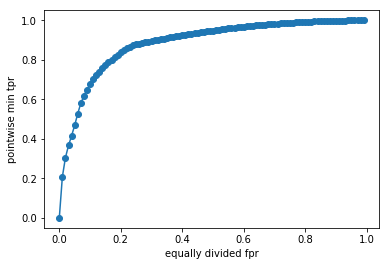

In [8]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

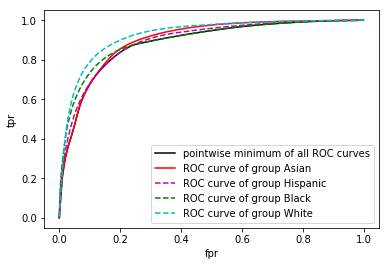

In [9]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [10]:
%%markdown
## Optimal false positive and true positive

## Optimal false positive and true positive


In [11]:
%%markdown 
## Optimal false positive and true positive rates output from semi-threshold classifier framework

## Optimal false positive and true positive rates output from semi-threshold classifier framework


In [12]:
target_rate = 2/3 #(this means loss from loaning to defaulter is 6 times as expensive as for profit from loaning to non-defaulter)
profit_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
print('optimal fp from semi-threshold classifiers with target rate:' + str(target_rate) + '=', opt_fp_semi)
print('optimal tp from semi-threshold classifiers with target rate:' + str(target_rate) + '=', opt_tp_semi)
print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)

optimal fp from semi-threshold classifiers with target rate:0.6666666666666666= 0.22
optimal tp from semi-threshold classifiers with target rate:0.6666666666666666= 0.8570924016256766
optimal profit from semi-threshold classifiers with target rate:0.6666666666666666= 27182.73554808442


In [13]:
%%markdown 
## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


In [14]:
DATA_DIR='fairmlbook/code/creditscore_compas/data/'
def cleanup_frame(frame):
    """Rename and re-order columns"""
    frame = frame.rename(columns={'Non- Hispanic white': 'White'})
    frame = frame.reindex(['Asian', 'Black', 'Hispanic', 'White'], axis=1)
    return frame

def read_totals():
    """Read the total number of people of each race"""
    frame = cleanup_frame(pd.read_csv(DATA_DIR+files['overall'], index_col=0))
    return {r:frame[r]['SSA'] for r in frame.columns}

def parse_data(data_dir=DATA_DIR):
    """Parse sqf data set."""

    cdfs = cleanup_frame(pd.read_csv(data_dir+files['cdf_by_race'], index_col=0))
    performance = 100-cleanup_frame(pd.read_csv(data_dir+files['performance_by_race'], index_col=0))
    return (cdfs/100., performance/100.)

files = dict(cdf_by_race = 'transrisk_cdf_by_race_ssa.csv',
             performance_by_race = 'transrisk_performance_by_race_ssa.csv',
             overall = 'totals.csv')

cdfs = cleanup_frame(pd.read_csv(DATA_DIR+files['cdf_by_race'], index_col=0))
performance = 100-cleanup_frame(pd.read_csv(DATA_DIR+files['performance_by_race'], index_col=0))

data_pair = parse_data()
totals = read_totals()

In [15]:
data = criteria.CriteriaData(data_pair[0], data_pair[1], totals)
result = data.two_sided_optimum(target_rate)
profit_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', profit_hps)

optimal fp from Hardt,Price and Sebro's framework with target rate:0.6666666666666666= 0.2256454841946488
optimal tp from Hardt,Price and Sebro's framework with target rate:0.6666666666666666= 0.8620581110783947
optimal profit from Hardt,Price and Sebro's framework with target rate:0.6666666666666666= 27188.30115864043


In [16]:
%%markdown
## Plot data 

## Plot data 


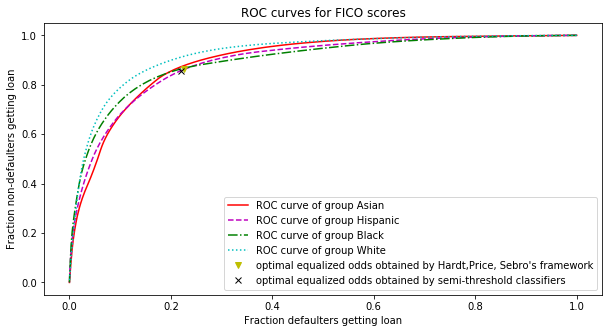

In [23]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':c',label='ROC curve of group White')
plt.plot(opt_fp_hps, opt_tp_hps,'vy',label = 'optimal equalized odds obtained by Hardt,Price, Sebro\'s framework')
plt.plot(opt_fp_semi,opt_tp_semi,'xk',label = 'optimal equalized odds obtained by semi-threshold classifiers')
plt.legend(loc=0)
plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
f.savefig('figure/fico_tr_1_3.png')

In [18]:
opt_slope = opt_tp_semi/opt_fp_semi
list_attrs = ['Asian','Hispanic','White','Black']
for attr in list_attrs: 
    tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
    found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr)-1)
    threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
    fpr_1 = eq_fpr[found_index_1]
    fpr_2 = eq_fpr[found_index_2]
    tpr_1 = tp_attr_list[found_index_1]
    tpr_2 = tp_attr_list[found_index_2]
    threshold_1 = threshold_attr_list[found_index_1]
    threshold_2 = threshold_attr_list[found_index_2]
    fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
    p_a = opt_fp_semi/fpa_opt #=opt_tp/tpa_opt
    print('Opt false positive for one threshold group '+attr+':',fpa_opt)
    print('Opt true positive for one threshold group '+attr+':',tpa_opt)
    print('Opt threshold for one threshold group '+attr+':',threshold_a_opt)
    print('Opt probablity p_a group '+attr+':',p_a)
    

Opt false positive for one threshold group Asian: 0.22510520209168838
Opt true positive for one threshold group Asian: 0.8769816285418113
Opt threshold for one threshold group Asian: 35.41782553014785
Opt probablity p_a group Asian: 0.977320816914711
Opt false positive for one threshold group Hispanic: 0.22
Opt true positive for one threshold group Hispanic: 0.8570924016256766
Opt threshold for one threshold group Hispanic: 28.282757800105756
Opt probablity p_a group Hispanic: 1.0
Opt false positive for one threshold group White: 0.236424913449607
Opt true positive for one threshold group White: 0.9210818039666654
Opt threshold for one threshold group White: 29.676256976083852
Opt probablity p_a group White: 0.9305279921225057
Opt false positive for one threshold group Black: 0.22211745425303311
Opt true positive for one threshold group Black: 0.8653417377668795
Opt threshold for one threshold group Black: 22.124328947754268
Opt probablity p_a group Black: 0.9904669614544522


In [19]:
#Opt values for different loss function ratios! 
diff_loss_fn = [0.3,0.6,0.5,0.2,0.1]#cost of a non-defaulter not getting a loan
diff_loss_fp = [0.2,0.2,0.5,0.3,0.2] #cost of a defaulter getting a loan
opt_fp_list = []
opt_tp_list = []

for i in range(0, len(diff_loss_fn)):
    opt_fp, opt_tp = get_optimal_fp_tp(diff_loss_fn[i],diff_loss_fp[i],pointwise_min_df,eq_fpr)
    print('optimal fp:', opt_fp)
    print('optimal tp:', opt_tp)
    opt_fp_list.append(opt_fp)
    opt_tp_list.append(opt_tp)
    

optimal fp: 0.24
optimal tp: 0.8733092020364959
optimal fp: 0.26
optimal tp: 0.8814756328226556
optimal fp: 0.21
optimal tp: 0.8478866038316747
optimal fp: 0.15
optimal tp: 0.7722440578670311
optimal fp: 0.12
optimal tp: 0.7213890547763219


Opt ratio:  3.638788341818733
Opt false positive for group Asian: 0.2448234786072924
Opt true positive for group Asian: 0.8908608197597235
Opt threshold for group Asian: 33.99140548243055
Opt probablity p_a group Asian: 0.980298137111966
Opt false positive for group Hispanic: 0.24
Opt true positive for group Hispanic: 0.8733092020364959
Opt threshold for group Hispanic: 27.195188490111956
Opt probablity p_a group Hispanic: 1.0
Opt false positive for group White: 0.2556665200515604
Opt true positive for group White: 0.9303163525569832
Opt threshold for group White: 28.629857731087093
Opt probablity p_a group White: 0.9387228329763283
Opt false positive for group Black: 0.24010935280863607
Opt true positive for group Black: 0.873707113761706
Opt threshold for group Black: 21.260376965556492
Opt probablity p_a group Black: 0.9995445708076052
Opt ratio:  3.390290895471752
Opt false positive for group Asian: 0.26661045682456924
Opt true positive for group Asian: 0.9038870044099018
Opt thres

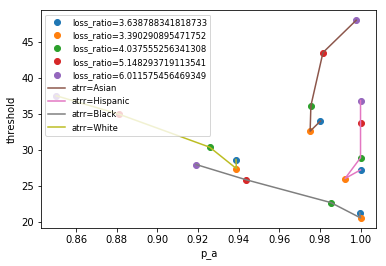

In [20]:
ta_pa_attr_dict = {'Asian': ([],[]), 'Hispanic': ([],[]), 'Black':([],[]), 'White': ([],[])}
for i in range(0,len(opt_fp_list)):
    opt_slope = opt_tp_list[i]/opt_fp_list[i]
    print('Opt ratio: ',opt_slope)
    same_opt_ratio_ta = []
    same_opt_ratio_pa = []
    for attr in list_attrs: 
        tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
        found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr) - 1)
        threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
        fpr_1 = eq_fpr[found_index_1]
        fpr_2 = eq_fpr[found_index_2]
        tpr_1 = tp_attr_list[found_index_1]
        tpr_2 = tp_attr_list[found_index_2]
        threshold_1 = threshold_attr_list[found_index_1]
        threshold_2 = threshold_attr_list[found_index_2]
        fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
        p_a = opt_fp_list[i]/fpa_opt #=opt_tp/tpa_opt
        same_opt_ratio_ta.append(threshold_a_opt)
        same_opt_ratio_pa.append(p_a)
        ta_pa_attr_dict[attr][0].append(p_a)
        ta_pa_attr_dict[attr][1].append(threshold_a_opt)
        print('Opt false positive for group '+attr+':',fpa_opt)
        print('Opt true positive for group '+attr+':',tpa_opt)
        print('Opt threshold for group '+attr+':',threshold_a_opt)
        print('Opt probablity p_a group '+attr+':',p_a)
    plt.plot(same_opt_ratio_pa,same_opt_ratio_ta,'o',label='loss_ratio='+str(opt_slope))
    
for attr,val in ta_pa_attr_dict.items():
    plt.plot(ta_pa_attr_dict[attr][0],ta_pa_attr_dict[attr][1],'-',label='atrr='+attr)

fontP = FontProperties()
fontP.set_size('small')
plt.legend(loc='upper left',prop=fontP)

plt.xlabel('p_a')
plt.ylabel('threshold')    

plt.show()
    